# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations:

The data suggest that cities with latitude between -20 and 20 has ideal conditions to take a vacation during this time of year.
Humidity and cloudiness varies no matter where you are; data shows a weak correlation between the two and location. 
There is a moderate negative relationship between Temperature and Latitude in the Northern Hemisphere.
There is however a stronger positive relationship between Temperature and Latitude in the Southern Hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# to track
city_tracker = 1
# set_tracker = 1

# lists for results
max_temp = []
humidity_list = []
cloudiness_results = []
wind_speed = []
cities_list = []
country_list =[]
latitude = []
longitude = []
date = []

print(f"Begin")

# for loop for query
for city in cities:
#     if (i % 50 == 0 and i >= 50):
#         city_tracker = 1
#         set_tracker += 1
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #cities_query 
    response = requests.get(url).json()
    #append to list
    try:
        max_temp.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_results.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
         #results
        print(f"Result # {city_tracker} | {city}")
        #next
        city_tracker += 1
    except: 
        print("Unable to locate city, next result")
        pass
print("End")

Begin
Result # 1 | punta arenas
Result # 2 | nieuw amsterdam
Result # 3 | bredasdorp
Result # 4 | cape town
Result # 5 | barsovo
Result # 6 | severo-kurilsk
Result # 7 | warri
Result # 8 | jamestown
Result # 9 | bara
Result # 10 | ponta do sol
Result # 11 | shingu
Result # 12 | cidreira
Result # 13 | laguna
Result # 14 | cajamarca
Result # 15 | albany
Result # 16 | port hardy
Result # 17 | rikitea
Result # 18 | ambilobe
Result # 19 | dikson
Result # 20 | puerto ayora
Result # 21 | terra rica
Result # 22 | richards bay
Result # 23 | butaritari
Result # 24 | najran
Result # 25 | van buren
Result # 26 | hammerfest
Result # 27 | tupik
Result # 28 | ushuaia
Result # 29 | ca mau
Result # 30 | rocha
Result # 31 | kavaratti
Result # 32 | akdepe
Result # 33 | bluff
Result # 34 | coquimbo
Result # 35 | vaini
Result # 36 | arraial do cabo
Result # 37 | hermanus
Unable to locate city, next result
Result # 38 | maumere
Result # 39 | dongsheng
Result # 40 | havelock
Result # 41 | constitucion
Result

Unable to locate city, next result
Unable to locate city, next result
Result # 299 | ponta delgada
Result # 300 | portel
Result # 301 | hutchinson
Result # 302 | yangjiang
Result # 303 | bauchi
Result # 304 | kendari
Result # 305 | edgewater
Result # 306 | ulaanbaatar
Result # 307 | caravelas
Result # 308 | nanortalik
Result # 309 | baruun-urt
Result # 310 | neyshabur
Result # 311 | los alamos
Result # 312 | skegness
Result # 313 | olafsvik
Result # 314 | muzhi
Result # 315 | hambantota
Result # 316 | mabaruma
Result # 317 | vicuna
Result # 318 | cabo san lucas
Result # 319 | pangnirtung
Result # 320 | anchorage
Result # 321 | port moresby
Result # 322 | sulecin
Result # 323 | bacalar
Result # 324 | san patricio
Unable to locate city, next result
Result # 325 | hargeysa
Result # 326 | general pico
Result # 327 | te anau
Result # 328 | amazar
Unable to locate city, next result
Result # 329 | sisophon
Result # 330 | okha
Result # 331 | margate
Result # 332 | isangel
Result # 333 | aktash

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#dictionary
Results = {
    "City": cities_list,
    "Country": country_list,
    "Latitude": latitude,
    "Longitude": longitude,
    "Date": date,
    "Cloudiness": cloudiness_results,
    "Humidity": humidity_list,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_api_df = pd.DataFrame(Results)
weather_api_df.count()

City          587
Country       587
Latitude      587
Longitude     587
Date          587
Cloudiness    587
Humidity      587
Max Temp      587
Wind Speed    587
dtype: int64

In [5]:
weather_api_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Punta Arenas,CL,-53.15,-70.92,1594685099,90,80,35.6,8.05
1,Nieuw Amsterdam,SR,5.88,-55.08,1594685100,40,83,80.6,8.05
2,Bredasdorp,ZA,-34.53,20.04,1594685101,70,87,46.4,13.87
3,Cape Town,ZA,-33.93,18.42,1594685101,75,76,52.0,8.05
4,Barsovo,RU,61.17,73.17,1594685101,1,87,57.2,8.95


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_api_df.describe()

,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
count,587.000000,587.000000,5.870000e+02,587.000000,587.000000,587.000000,587.000000
mean,20.913169,20.013765,1.594685e+09,47.255537,72.349233,67.108842,7.552964
std,33.820598,88.546389,7.373347e+01,37.653025,19.189792,14.021178,5.673187
min,-54.800000,-179.170000,1.594685e+09,0.000000,1.000000,33.800000,0.220000
25%,-5.385000,-57.150000,1.594685e+09,6.000000,62.000000,56.030000,3.360000
50%,26.120000,24.600000,1.594685e+09,40.000000,77.000000,69.800000,6.290000
75%,50.310000,94.580000,1.594685e+09,85.000000,86.000000,77.785000,10.300000
max,78.220000,179.320000,1.594685e+09,100.000000,100.000000,111.000000,55.990000


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

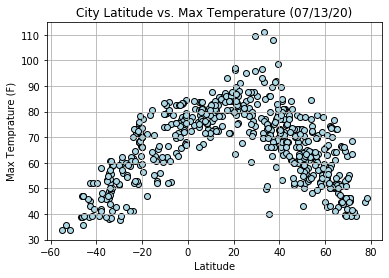

In [10]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Max Temp"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

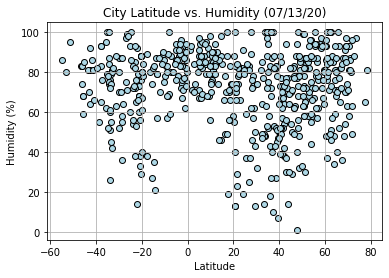

In [11]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Humidity"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

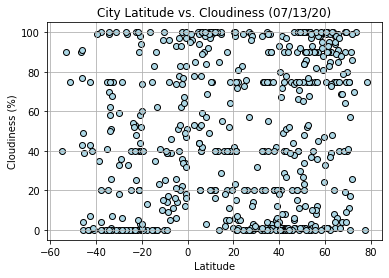

In [12]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Cloudiness"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

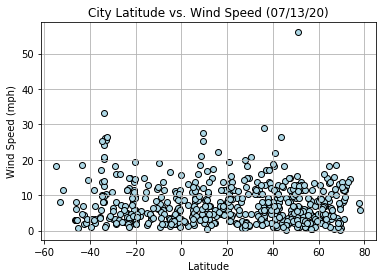

In [13]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Wind Speed"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_lat_df = weather_api_df.loc[weather_api_df["Latitude"] >= 0, :]
northern_lat_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
1,Nieuw Amsterdam,SR,5.88,-55.08,1594685100,40,83,80.60,8.05
4,Barsovo,RU,61.17,73.17,1594685101,1,87,57.20,8.95
5,Severo-Kuril'sk,RU,50.68,156.12,1594685101,100,85,50.31,2.89
6,Warri,NG,5.52,5.75,1594685101,100,88,75.60,5.03
7,Jamestown,US,42.10,-79.24,1594685050,1,64,70.00,10.29


In [15]:
southern_lat_df = weather_api_df.loc[weather_api_df["Latitude"] < 0, :]
southern_lat_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Punta Arenas,CL,-53.15,-70.92,1594685099,90,80,35.60,8.05
2,Bredasdorp,ZA,-34.53,20.04,1594685101,70,87,46.40,13.87
3,Cape Town,ZA,-33.93,18.42,1594685101,75,76,52.00,8.05
11,Cidreira,BR,-30.18,-50.21,1594685103,59,70,51.35,10.80
13,Cajamarca,PE,-7.16,-78.50,1594685104,39,80,52.38,1.95


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.7
The r-squared is: 0.48468485656582816


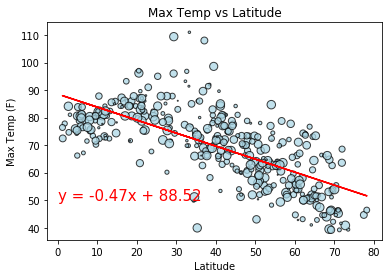

In [17]:
Latitude = northern_lat_df["Latitude"]
Max_Temp = northern_lat_df["Max Temp"]
correlation = st.pearsonr(Latitude, Max_Temp)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temp)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Max_Temp, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.81
The r-squared is: 0.6557238780718933


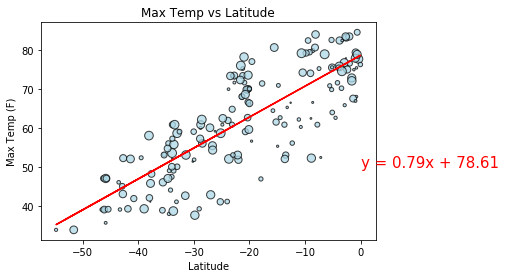

In [19]:
Latitude = southern_lat_df["Latitude"]
Max_Temp = southern_lat_df["Max Temp"]
correlation = st.pearsonr(Latitude, Max_Temp)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temp)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Max_Temp, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0
The r-squared is: 3.298937963987655e-06


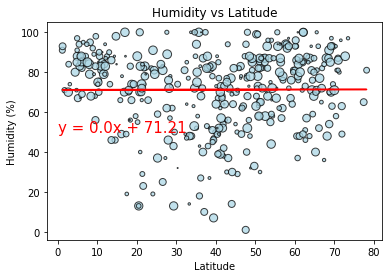

In [20]:
Latitude = northern_lat_df["Latitude"]
Humidity = northern_lat_df["Humidity"]
correlation = st.pearsonr(Latitude, Humidity)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.13
The r-squared is: 0.015798037160302363


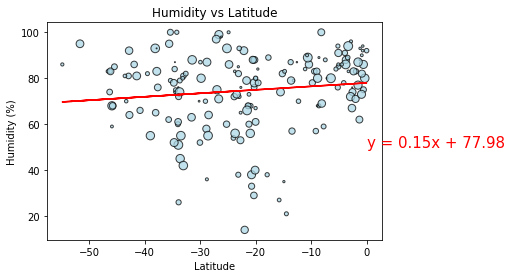

In [22]:
Latitude = southern_lat_df["Latitude"]
Humidity = southern_lat_df["Humidity"]
correlation = st.pearsonr(Latitude, Humidity)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.01
The r-squared is: 0.00018992227803553036


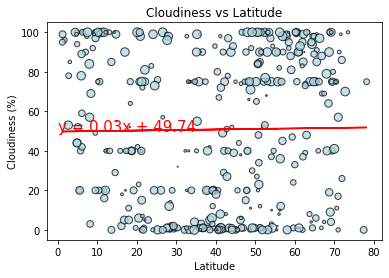

In [23]:
Latitude = northern_lat_df["Latitude"]
Cloudiness = northern_lat_df["Cloudiness"]
correlation = st.pearsonr(Latitude, Cloudiness)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.1
The r-squared is: 0.009274448773074297


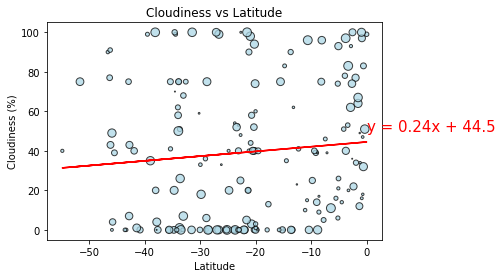

In [24]:
Latitude = southern_lat_df["Latitude"]
Cloudiness = southern_lat_df["Cloudiness"]
correlation = st.pearsonr(Latitude, Cloudiness)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.08
The r-squared is: 0.006630276601942944


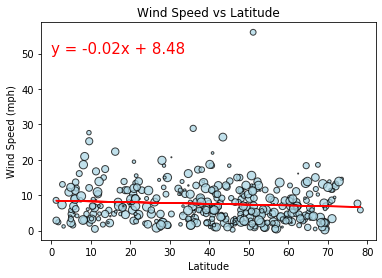

In [25]:
Latitude = northern_lat_df["Latitude"]
Wind_Speed = northern_lat_df["Wind Speed"]
correlation = st.pearsonr(Latitude, Wind_Speed)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.17
The r-squared is: 0.029967744861307617


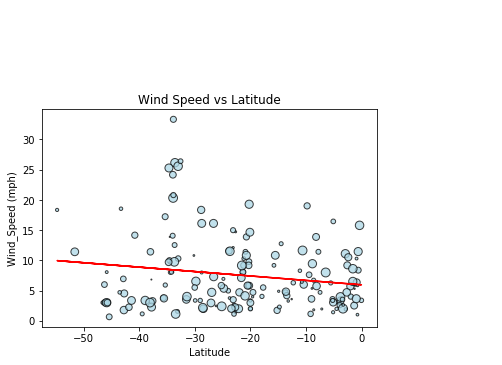

In [26]:
Latitude = southern_lat_df["Latitude"]
Wind_Speed = southern_lat_df["Wind Speed"]
correlation = st.pearsonr(Latitude, Wind_Speed)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [27]:
weather_api_df.to_csv("Output/weather.csv", index=False, header=True)